               name                                        ingredients  \
0        Balu shahi                    Maida flour, yogurt, oil, sugar   
1            Boondi                            Gram flour, ghee, sugar   
2    Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3            Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4       Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   
..              ...                                                ...   
250       Til Pitha            Glutinous rice, black sesame seeds, gur   
251         Bebinca  Coconut milk, egg yolks, clarified butter, all...   
252          Shufta  Cottage cheese, dry dates, dried rose petals, ...   
253       Mawa Bati  Milk powder, dry fruits, arrowroot powder, all...   
254          Pinaca  Brown rice, fennel seeds, grated coconut, blac...   

           diet  prep_time  cook_time flavor_profile   course  \
0    vegetarian         45         25         

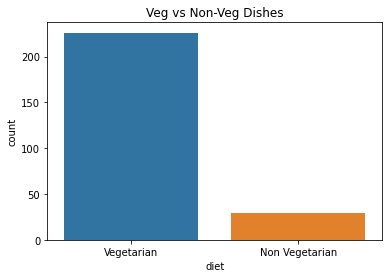

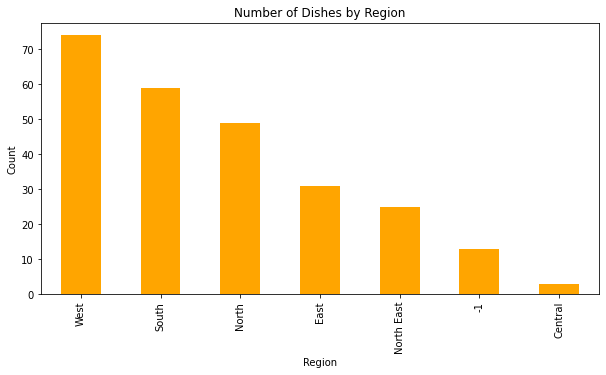

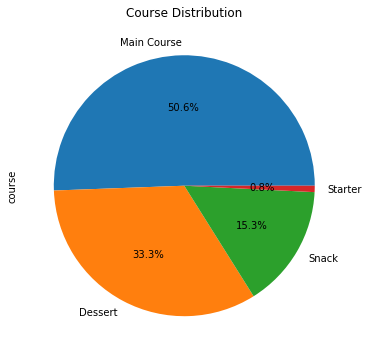

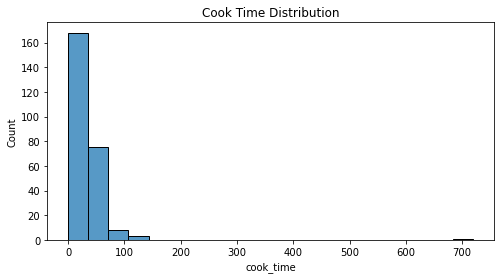

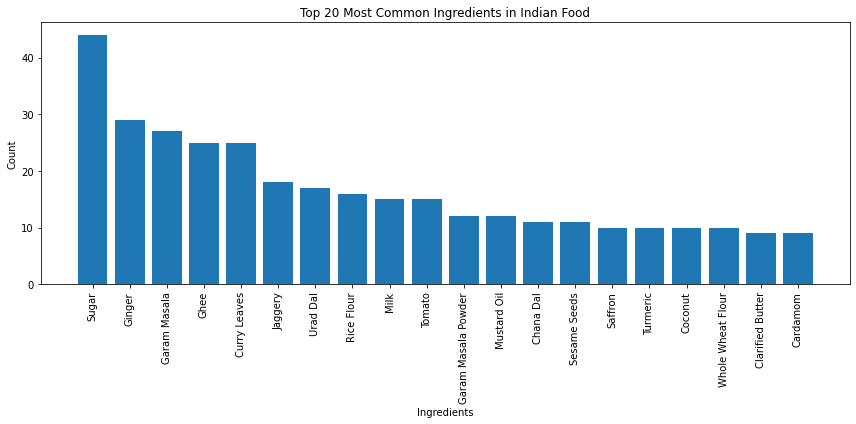

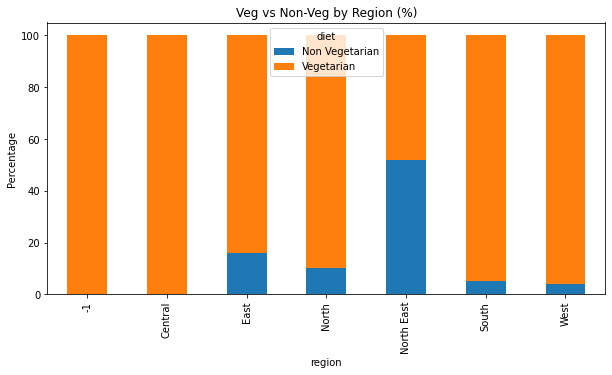

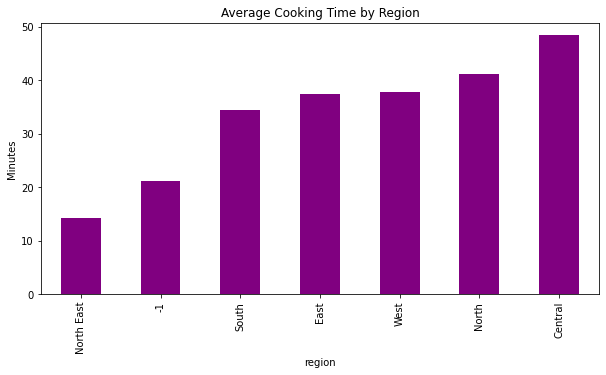

FASTEST DISHES:
                name  cook_time
254          Pinaca         -1
152         Poriyal         -1
167     Kolim Jawla         -1
172      Bombil fry         -1
134  Keerai masiyal         -1
132  Kaara kozhambu         -1
185        Ghooghra         -1
187        Halvasan         -1
216      Farsi Puri         -1
65      Pork Bharta         -1

SLOWEST DISHES:
                   name  cook_time
62           Shrikhand        720
27             Malapua        120
75             Biryani        120
114        Pindi chana        120
34            Rasgulla         90
115       Rajma chaval         90
83   Daal baati churma         90
128               Dosa         90
130               Idli         90
142       Kuzhakkattai         90
Total Dishes: 255
Veg %: 0
Non-Veg %: 0
Most Common Region: West
Minimum Cook Time: -1
Maximum Cook Time: 720
Median Cook Time: 30.0


In [5]:
# Install & Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Load the Dataset
df = pd.read_csv(r"C:\Users\ajayg\Downloads\archive\indian_food.csv")
print(df)
# Explore the Data
df.info()
df.describe(include='all')
df.isnull().sum()
# Data Cleaning
  # Standardize text formatting
for col in ["diet", "course", "region"]:
    df[col] = df[col].str.title()
  # Handle Missing Values
df['cook_time'] = df['cook_time'].fillna(df['cook_time'].mean())
df['prep_time'] = df['prep_time'].fillna(df['prep_time'].mean())
df['ingredients'] = df['ingredients'].fillna("Unknown")
  # Remove duplicates
df.drop_duplicates(inplace=True)
# Veg vs Non-Veg Distribution 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diet')
plt.title("Veg vs Non-Veg Dishes")
plt.show()
# Dishes by Region
plt.figure(figsize=(10,5))
df['region'].value_counts().plot(kind='bar', color='orange')
plt.title("Number of Dishes by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()
# Course Distribution
plt.figure(figsize=(6,6))
df['course'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Course Distribution")
plt.show()
# Cooking Time Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['cook_time'], bins=20)
plt.title("Cook Time Distribution")
plt.show()
# Most Frequent Ingredients
all_ing = ",".join(df['ingredients']).replace(" ", "").split(",")
common_ing = Counter(all_ing).most_common(20)
common_ing

# Count ingredients
all_ingredients = ",".join(df['ingredients']).split(",")
counts = Counter(all_ingredients).most_common(20)

# Split into ingredient names and frequencies
ingredients = [item[0].strip().title() for item in counts]
frequency = [item[1] for item in counts]

# Plot
plt.figure(figsize=(12,6))
plt.bar(ingredients, frequency)
plt.xticks(rotation=90)
plt.title("Top 20 Most Common Ingredients in Indian Food")
plt.xlabel("Ingredients")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
# Veg/Non-Veg Ratio by Region
region_diet = df.groupby('region')['diet'].value_counts(normalize=True).unstack() * 100
region_diet.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Veg vs Non-Veg by Region (%)")
plt.ylabel("Percentage")
plt.show()
# Average Cooking Time by Region
plt.figure(figsize=(10,5))
df.groupby('region')['cook_time'].mean().sort_values().plot(kind='bar', color='purple')
plt.title("Average Cooking Time by Region")
plt.ylabel("Minutes")
plt.show()
# Top 10 Fastest & Slowest Dishes
fastest = df.sort_values('cook_time').head(10)
slowest = df.sort_values('cook_time', ascending=False).head(10)
print("FASTEST DISHES:\n", fastest[['name', 'cook_time']])
print("\nSLOWEST DISHES:\n", slowest[['name', 'cook_time']])
# Summary Insights
print("Total Dishes:", len(df))
df['diet'] = df['diet'].str.lower().str.strip()
counts = df['diet'].value_counts(normalize=True) * 100
print("Veg %:", round(counts.get('veg', 0), 2))
print("Non-Veg %:", round(counts.get('non veg', 0), 2))
print("Most Common Region:", df['region'].mode()[0])
print("Minimum Cook Time:", df['cook_time'].min())
print("Maximum Cook Time:", df['cook_time'].max())
print("Median Cook Time:", df['cook_time'].median())



In [8]:
!pip install wordCloud